In [ ]:
!wget https://github.com/Reghunaath/Indian_food_dataset/raw/master/tfds.pickle

--2021-10-31 17:00:32--  https://github.com/Reghunaath/Indian_food_dataset/raw/master/tfds.pickle
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Reghunaath/Indian_food_dataset/master/tfds.pickle [following]
--2021-10-31 17:00:32--  https://media.githubusercontent.com/media/Reghunaath/Indian_food_dataset/master/tfds.pickle
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 783746386 (747M) [application/octet-stream]
Saving to: ‘tfds.pickle.1’

tfds.pickle.1       100%[===================>] 747.44M   132MB/s    in 5.4s    

2021-10-31 17:00:47 (139 MB/s) - ‘tfds.pickle.1’ saved [7837

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,Dropout
import os
import cv2
import random
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from google.colab import files
from keras.utils.np_utils import to_categorical
tb=TensorBoard(log_dir="logs//{}".format(time.time()))
p1=open("/content/tfds.pickle","rb")
def prepare_ds():
    dir="drive//My Drive//dataset//"
    cat=os.listdir(dir)
    i=1
    td=[]
    for x in cat:
        d=dir+x
        y1=cat.index(x)
        for img in os.listdir(d):
            im=cv2.imread(d+"//"+img)
            print(i)
            i=i+1
            im=cv2.resize(im,(200,200))
            td.append([im,y1])
    ##      im[:,:,0],im[:,:,2]=im[:,:,2],im[:,:,0].copy()
    ##      plt.imshow(im)
    ##      plt.show()
    random.shuffle(td)
    X=[]
    Y=[]
    for a1,a2 in td:
        X.append(a1)
        Y.append(a2)
    X=np.array(X).reshape(-1,200,200,3)
    Y=np.array(Y).reshape(-1,1)
    pickle.dump([X,Y],p1)
##prepare_ds()
X,Y=pickle.load(p1)
X=X/255.0
X=X.astype('float16')
def learn():
    model=tf.keras.models.Sequential()
    model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))


    model.add(Conv2D(64,(3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))



    model.add(Flatten())
    # model.add(Dense(512))
    # model.add(Activation("relu"))

    model.add(Dropout(0.6))
    model.add(Dense(10,kernel_regularizer=regularizers.l2(0.55)))
    model.add(Activation('softmax'))

    #model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    #model.fit(X, Y,batch_size=16,validation_split=0.1,epochs=200,verbose=2,callbacks=[tb])
    #model.summary()
    #model.save('tm1.h5')
learn()

p1.close()
#!zip -r /content/star.zip /content/logs
#!cp file.zip "/content/drive/My Drive/"
#files.download('star.zip')


In [ ]:
+model.summary()

NameError: ignored

In [ ]:
def prepare_ds():
    dir="D:\\deep learning\\dataset\\train\\"
    cat=os.listdir(dir)
    i=1
    td=[]
    for x in cat:
        d=dir+x
        y1=cat.index(x)
        for img in os.listdir(d):
            im=cv2.imread(d+"\\"+img)
            print(i)
            i=i+1
            gen=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
            width_shift_range=0.1,height_shift_range=0.1,shear_range=0.15,
            zoom_range=0.1,channel_shift_range=10,horizontal_flip=True)
            geniter=gen.flow(im)
            aug_images=[next(aug_iter)[0].astype(np.unit8) for i in range(10)]
            im=cv2.resize(im,(200,200))
            td.append([im,y1])
    ##      im[:,:,0],im[:,:,2]=im[:,:,2],im[:,:,0].copy()
    ##      plt.imshow(im)
    ##      plt.show()
    random.shuffle(td)
    X=[]
    Y=[]
    for a1,a2 in td:
        X.append(a1)
        Y.append(a2)
    X=np.array(X).reshape(-1,200,200,3)
    Y=np.array(Y).reshape(-1,1)
    pickle.dump([X,Y],p1)

In [ ]:
import pickle
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model=load_model('fin.h5')

In [ ]:
import sklearn.metrics
y_pred=model.predict([X])
#matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
import sklearn.metrics
y_pred2=np.array(y_pred2)
y_pred2=y_pred2.reshape(-1,1)
matrix = sklearn.metrics.confusion_matrix(Y, y_pred2)

In [ ]:
matrix

array([[607,  16,   7,   6,   8,  11,   1,   5,   7,   5],
       [  1, 577,  11,   0,  29,   1,  11,   5,   2,   2],
       [  1,  15, 631,   6,  14,   3,   2,   5,   2,   3],
       [  3,   5,  21, 708,   9,   3,   1,   3,   1,   1],
       [  1,  27,   8,   5, 578,   4,  21,   1,   3,   3],
       [  1,   3,   2,   1,   7, 680,   6,   2,   1,   2],
       [  0,  20,   4,   4,  42,   6, 521,   2,   6,   6],
       [  2,  12,  20,  10,   9,   1,   4, 515,   5,   1],
       [  9,  18,   4,   6,  17,   2,   5,   1, 504,  12],
       [  1,   2,   5,   0,  16,   0,   6,   3,   1, 624]])

In [ ]:
Y.shape

(6531, 1)

In [ ]:
y_pred.shape
y_pred2=[]
for i in y_pred:
  i=list(i)
  y_pred2.append(i.index(max(i)))

In [ ]:
import sklearn.metrics
y=model.predict(X)

NameError: ignored

In [ ]:
X.shape

(6531, 200, 200, 3)

In [ ]:
y_pred2.reshape(-1,1)

array([[6],
       [1],
       [4],
       ...,
       [5],
       [0],
       [3]])

In [ ]:
Y.argmax(axis=1)

array([0, 0, 0, ..., 0, 0, 0])

Text(33.0, 0.5, 'Actual')

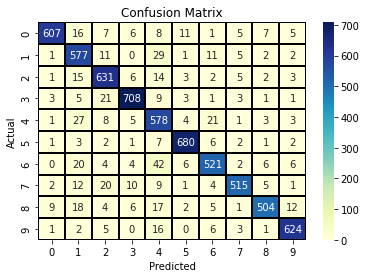

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y,y_pred2)
sns.heatmap(cm, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(Y,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       673
           1       0.83      0.90      0.87       639
           2       0.88      0.93      0.90       682
           3       0.95      0.94      0.94       755
           4       0.79      0.89      0.84       651
           5       0.96      0.96      0.96       705
           6       0.90      0.85      0.88       611
           7       0.95      0.89      0.92       579
           8       0.95      0.87      0.91       578
           9       0.95      0.95      0.95       658

    accuracy                           0.91      6531
   macro avg       0.91      0.91      0.91      6531
weighted avg       0.91      0.91      0.91      6531

